In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
palette = sns.color_palette("mako")

In [3]:
df = pd.read_csv('ug_stockist_sale_transactions.csv')
df.head()

,sale_date,saletransaction_id,product_name,product_id,depot_name,unit_cost,unit_price,region_name,manufacturer_name,category_name,product_type,price_type,depot_county_name,depot_id
0,2022-03-01 05:06:23 UTC,71485110,Sukumawiki,309834,Gang Pur 001,6000.0,7000.0,Northern Region - UG,East African Seed Company Ltd.,Seeds,50g,Retail,Gulu,942
1,2022-03-01 05:06:23 UTC,71485111,Sulban,309755,Gang Pur 001,4800.0,6000.0,Northern Region - UG,Osho Chemical Industries Ltd.,insecticide,100ml,Retail,Gulu,942
2,2022-03-01 05:06:23 UTC,71485108,Mancozeb,309785,Gang Pur 001,4500.0,5000.0,Northern Region - UG,East African Seed Company Ltd.,Fungicide,250g,Retail,Gulu,942
3,2022-03-01 05:06:23 UTC,71485109,Dudu Acelamectin,184656,Gang Pur 001,4000.0,5000.0,Northern Region - UG,Bukoola Chemicals Industries Ltd.,Agrochemicals,100ml,Retail,Gulu,942
4,2022-03-01 05:36:11 UTC,69584206,Bazoka,245297,Tropical Farm Supplies limited,7500.0,10000.0,Northern Region - UG,Naseco,Seed,1kg,Retail,Apac,1831


In [4]:
categories = ['Agrochemicals', 'Equipment', 'Feeds', 'Fertilizers', 'Hygiene', 'Minerals and Supplements', 'Seeds', 'Services', 'Veterinary Products']
df = df[df['category_name'].isin(categories)]
df.reset_index(drop = True)
df['category_name'].unique()

array(['Seeds', 'Agrochemicals', 'Veterinary Products', 'Fertilizers',
       'Feeds', 'Equipment', 'Minerals and Supplements', 'Hygiene'],
      dtype=object)

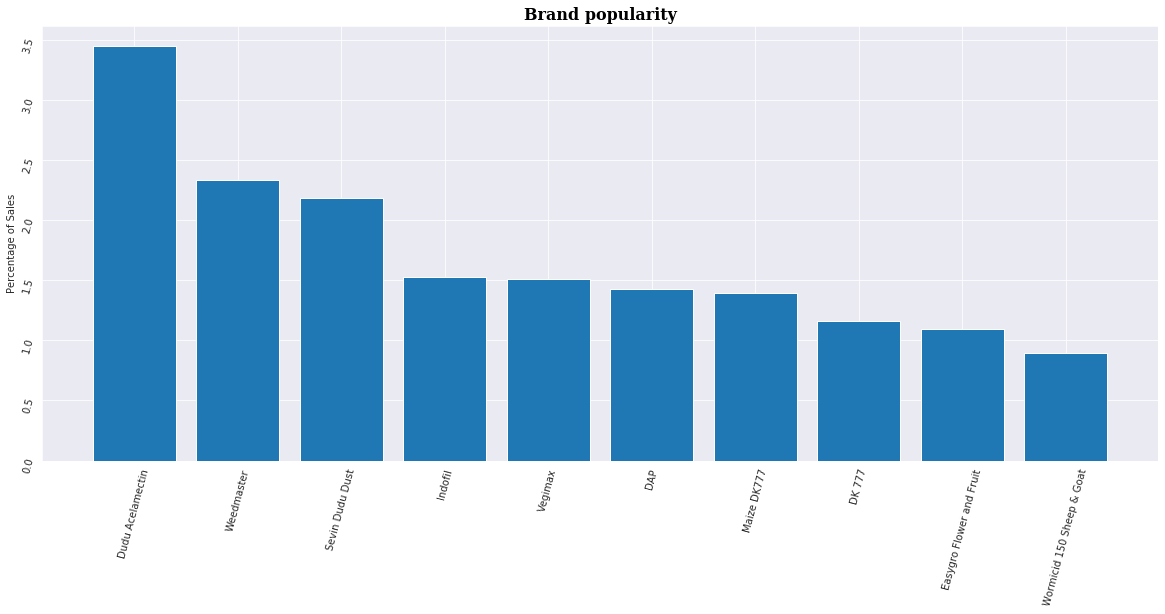

In [5]:
# brand popularity
counts = df['product_name'].value_counts()
percentages = (counts/counts.sum()) *100
prod_pop_df = pd.DataFrame({
              'Counts': counts,
              'Percentages': percentages})
top_10_prod = prod_pop_df.sort_values(by='Percentages', ascending=False)[:10]

_=plt.bar(top_10_prod.index, top_10_prod['Percentages'], )
_=plt.title('Brand popularity', fontweight='bold', fontsize=16, color='black', fontfamily='serif')
_=plt.ylabel('Percentage of Sales')
_=plt.tick_params(rotation = 75)
_=plt.gcf().set_size_inches(20,8)


In [6]:
_=df.groupby('depot_county_name')['product_name'].value_counts()
most_common_prod = _.groupby('depot_county_name').head(1)
common_df = pd.DataFrame(most_common_prod)
common_df.rename(columns = {'product_name': 'product_count'}, inplace=True)
common_df.reset_index(inplace=True)
new = pd.DataFrame(df['depot_county_name'].value_counts()).reset_index().sort_values(by = 'index', ascending = True)
new.rename(columns = {'index': 'depot_county_name', 'depot_county_name': 'total'}, inplace=True)
most_common_prod_df = pd.merge(common_df, new, on='depot_county_name')
most_common_prod_df['proportion'] = round((most_common_prod_df['product_count'] / most_common_prod_df['total']) * 100, 1)
most_common_prod_df

,depot_county_name,product_name,product_count,total,proportion
0,Abim,African Egg Plant Ngogwe,3,21,14.3
1,Amuria,Sevin Dudu Dust,635,2536,25.0
2,Amuru,Sevin Dudu Dust,190,1534,12.4
3,Apac,Super gro,412,2938,14.0
4,Bugiri,Dudu Acelamectin,66,363,18.2
...,...,...,...,...,...
56,Sembambule,Norotraz 12.5%,49,634,7.7
57,Sironko,DAP,406,5273,7.7
58,Soroti,Sevin Dudu Dust,1334,6315,21.1
59,Tororo,Maize Longe 10H,2199,65965,3.3


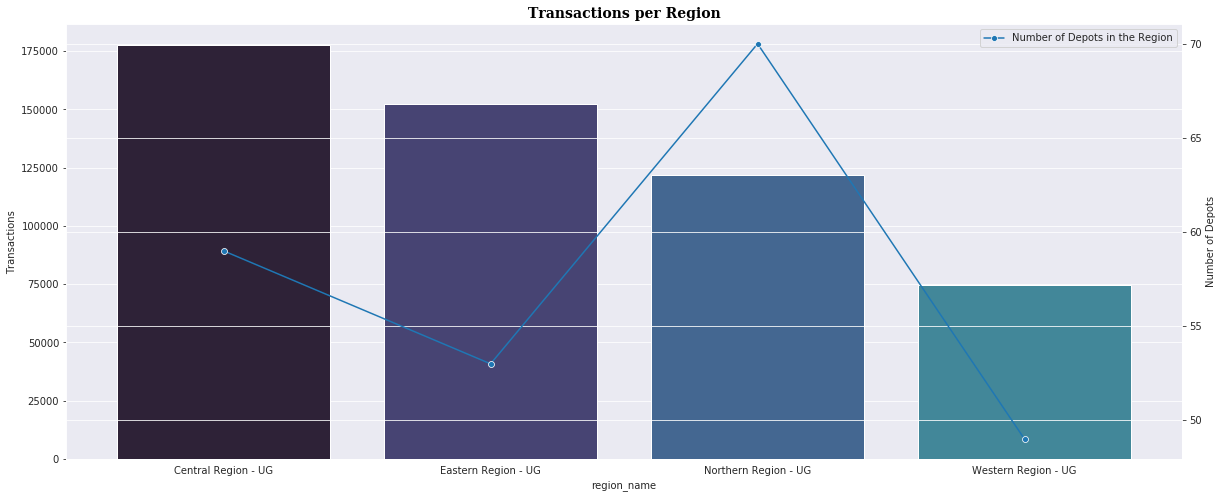

In [7]:
manuf = df['manufacturer_name'].value_counts()[:10].to_frame()
depot_df = df.groupby('region_name')['depot_id'].nunique().to_frame().reset_index()

# Set up the figure
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()

# Plot on the ax object
ax1 = sns.countplot(x = df['region_name'], order=df['region_name'].value_counts().index, palette= palette, ax=ax1)
ax2 = sns.lineplot(x='region_name', y='depot_id', data=depot_df, ax=ax2, sort=False, marker = 'o', label = 'Number of Depots in the Region')
plt.title('Transactions per Region', fontweight='bold', fontsize=14, color='black', fontfamily='serif')
ax1.set_ylabel('Transactions')
ax2.set_ylabel('Number of Depots')
plt.gcf().set_size_inches(20,8)
plt.legend()
plt.show()

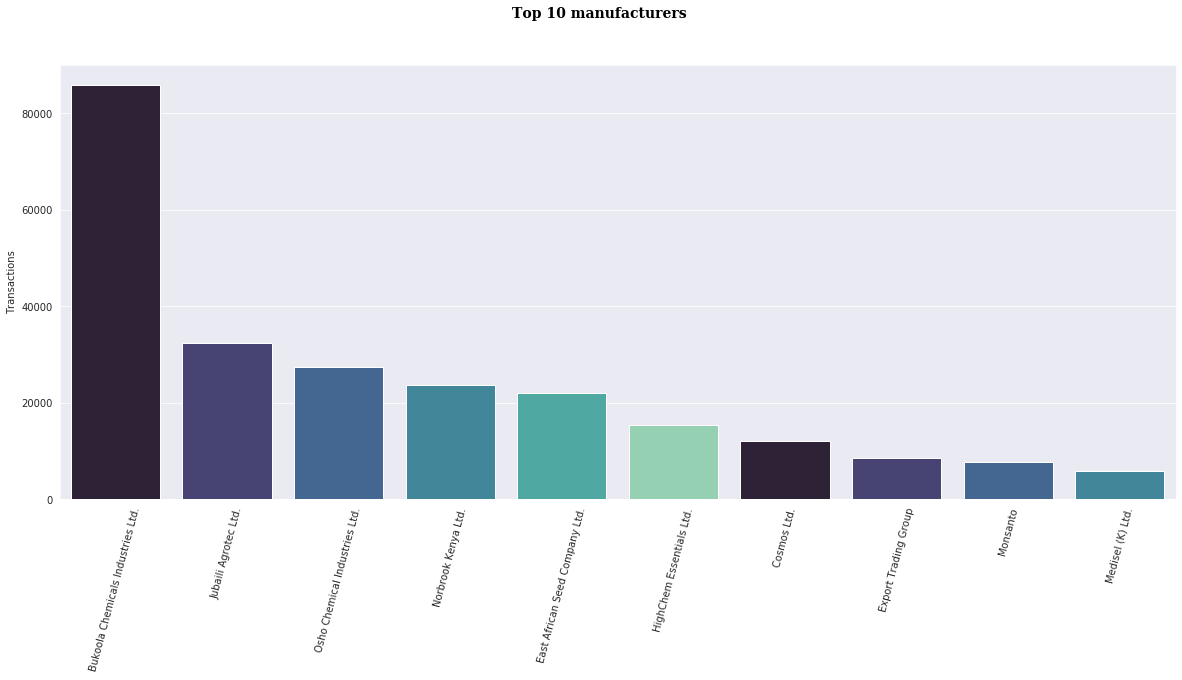

In [8]:
manuf = df['manufacturer_name'].value_counts()[:10].to_frame()
sns.barplot(x = manuf.index, y = manuf['manufacturer_name'], palette= palette)
plt.suptitle('Top 10 manufacturers', fontweight='bold', fontsize=14, color='black', fontfamily='serif')
plt.ylabel('Transactions')
plt.xticks(rotation = 75)
plt.gcf().set_size_inches(20,8)
plt.show()

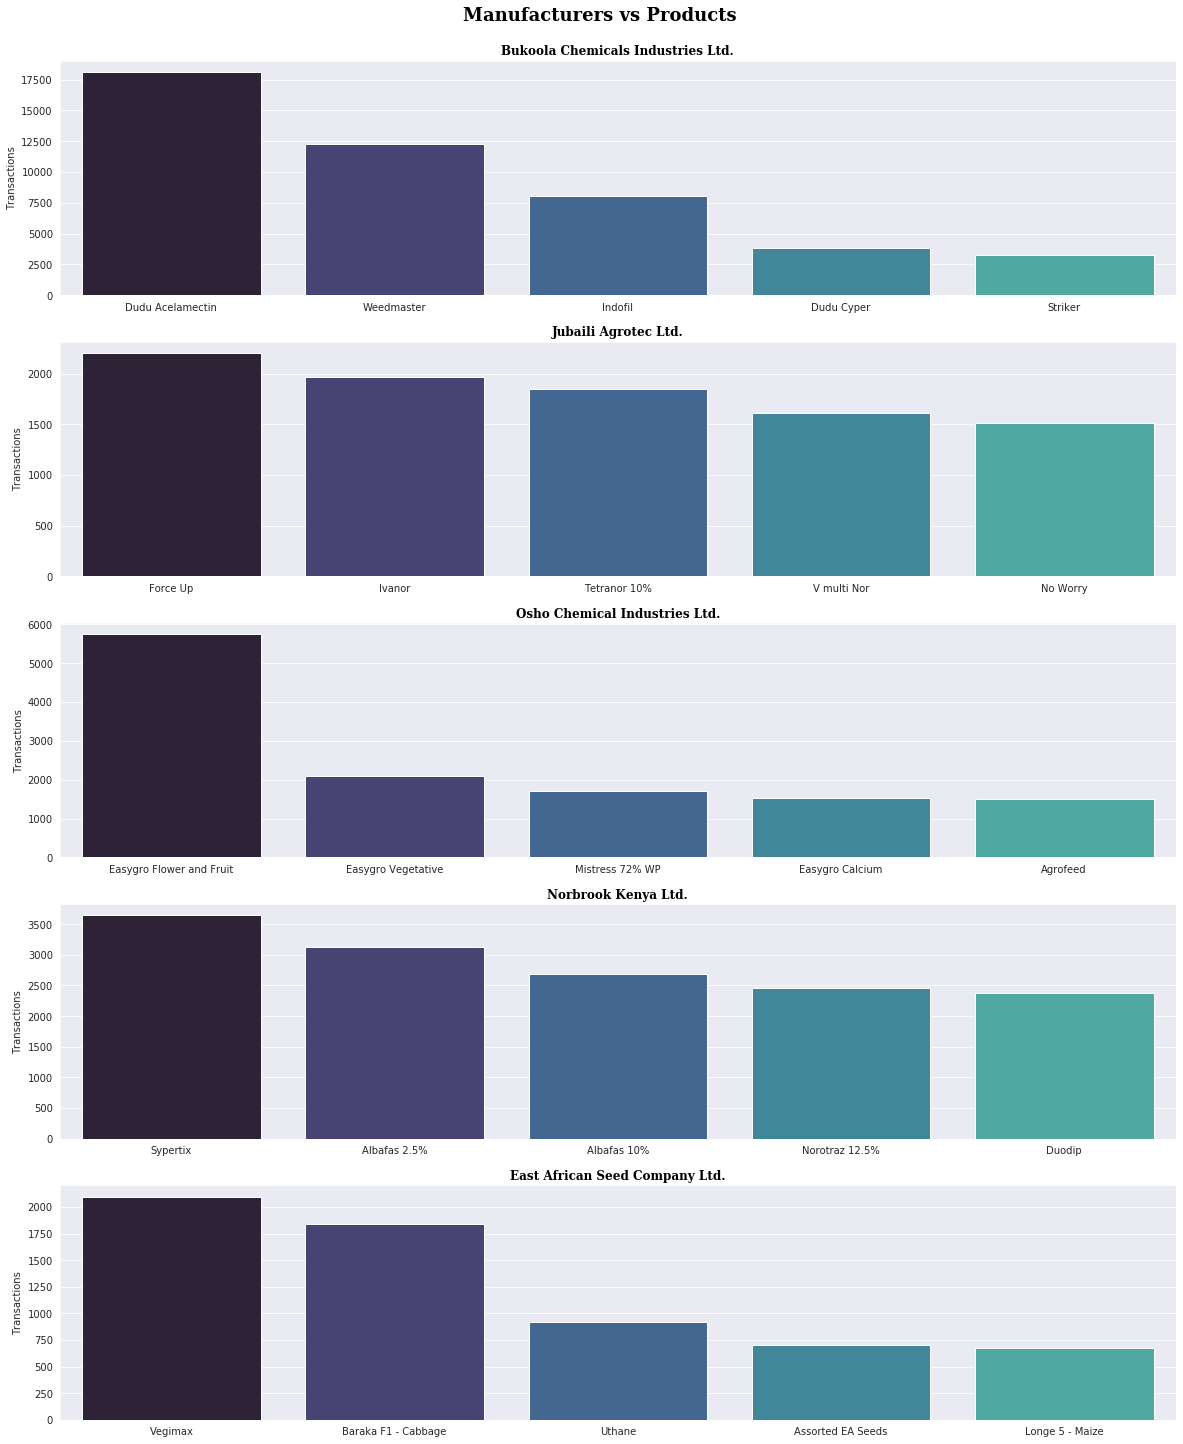

In [9]:
# # creating dataframes to be visualized
Bukoola = df[df['manufacturer_name'] == 'Bukoola Chemicals Industries Ltd.']
Bukoola = Bukoola['product_name'].value_counts()[:5].to_frame()
Bukoola.rename(columns = {'product_name': 'Bukoola Chemicals Industries Ltd.'}, inplace=True)

Jubaili = df[df['manufacturer_name'] == 'Jubaili Agrotec Ltd.']
Jubaili = Jubaili['product_name'].value_counts()[:5].to_frame()
Jubaili.rename(columns = {'product_name': 'Jubaili Agrotec Ltd.'}, inplace=True)

Osho = df[df['manufacturer_name'] == 'Osho Chemical Industries Ltd.']
Osho = Osho['product_name'].value_counts()[:5].to_frame()
Osho.rename(columns = {'product_name': 'Osho Chemical Industries Ltd.'}, inplace=True)

Norbrook = df[df['manufacturer_name'] == 'Norbrook Kenya Ltd.']
Norbrook = Norbrook['product_name'].value_counts()[:5].to_frame()
Norbrook.rename(columns = {'product_name': 'Norbrook Kenya Ltd.'}, inplace=True)

EASC = df[df['manufacturer_name'] == 'East African Seed Company Ltd.']
EASC = EASC['product_name'].value_counts()[:5].to_frame()
EASC.rename(columns = {'product_name': 'East African Seed Company Ltd.'}, inplace=True)

# generating the figure and axes
fig, axs = plt.subplots(5, 1, figsize = (20,25))
# fig.subplots_adjust(hspace = .5, wspace=.1)
fig.suptitle('Manufacturers vs Products', fontweight='bold', fontsize=18, color='black', fontfamily='serif', y=0.91)
axs = axs.ravel()

# creating the list of dfs to be plotted
list_dfs = [Bukoola, Jubaili, Osho, Norbrook, EASC]

# plotting the data
for n, data in enumerate(list_dfs):
    sns.barplot(x = data.index, y = data.iloc[:,0], palette= palette, ax = axs[n])
    axs[n].set_title(data.columns[0], fontweight='bold', fontsize=12, color='black', fontfamily='serif')
    axs[n].set_ylabel('Transactions')

In [10]:
#  # creating dataframes to be visualized
# Bukoola = df[df['manufacturer_name'] == 'Bukoola Chemicals Industries Ltd.'][['region_name', 'product_name', 'category_name', 'manufacturer_name' ]]
# Bukoola = Bukoola.groupby('category_name', 'manufacturer_name')['product_name'].value_counts()[:5].to_frame()
# # # Bukoola.rename(columns = {'product_name': 'Bukoola Chemicals Industries Ltd.'}, inplace=True)

# Jubaili = df[df['manufacturer_name'] == 'Jubaili Agrotec Ltd.']
# Jubaili = Jubaili['product_name'].value_counts()[:5].to_frame()
# Jubaili.rename(columns = {'product_name': 'Jubaili Agrotec Ltd.'}, inplace=True)

# Osho = df[df['manufacturer_name'] == 'Osho Chemical Industries Ltd.']
# Osho = Osho['product_name'].value_counts()[:5].to_frame()
# Osho.rename(columns = {'product_name': 'Osho Chemical Industries Ltd.'}, inplace=True)

# Norbrook = df[df['manufacturer_name'] == 'Norbrook Kenya Ltd.']
# Norbrook = Norbrook['product_name'].value_counts()[:5].to_frame()
# Norbrook.rename(columns = {'product_name': 'Norbrook Kenya Ltd.'}, inplace=True)

# EASC = df[df['manufacturer_name'] == 'East African Seed Company Ltd.']
# EASC = EASC['product_name'].value_counts()[:5].to_frame()
# EASC.rename(columns = {'product_name': 'East African Seed Company Ltd.'}, inplace=True)
# Bukoola

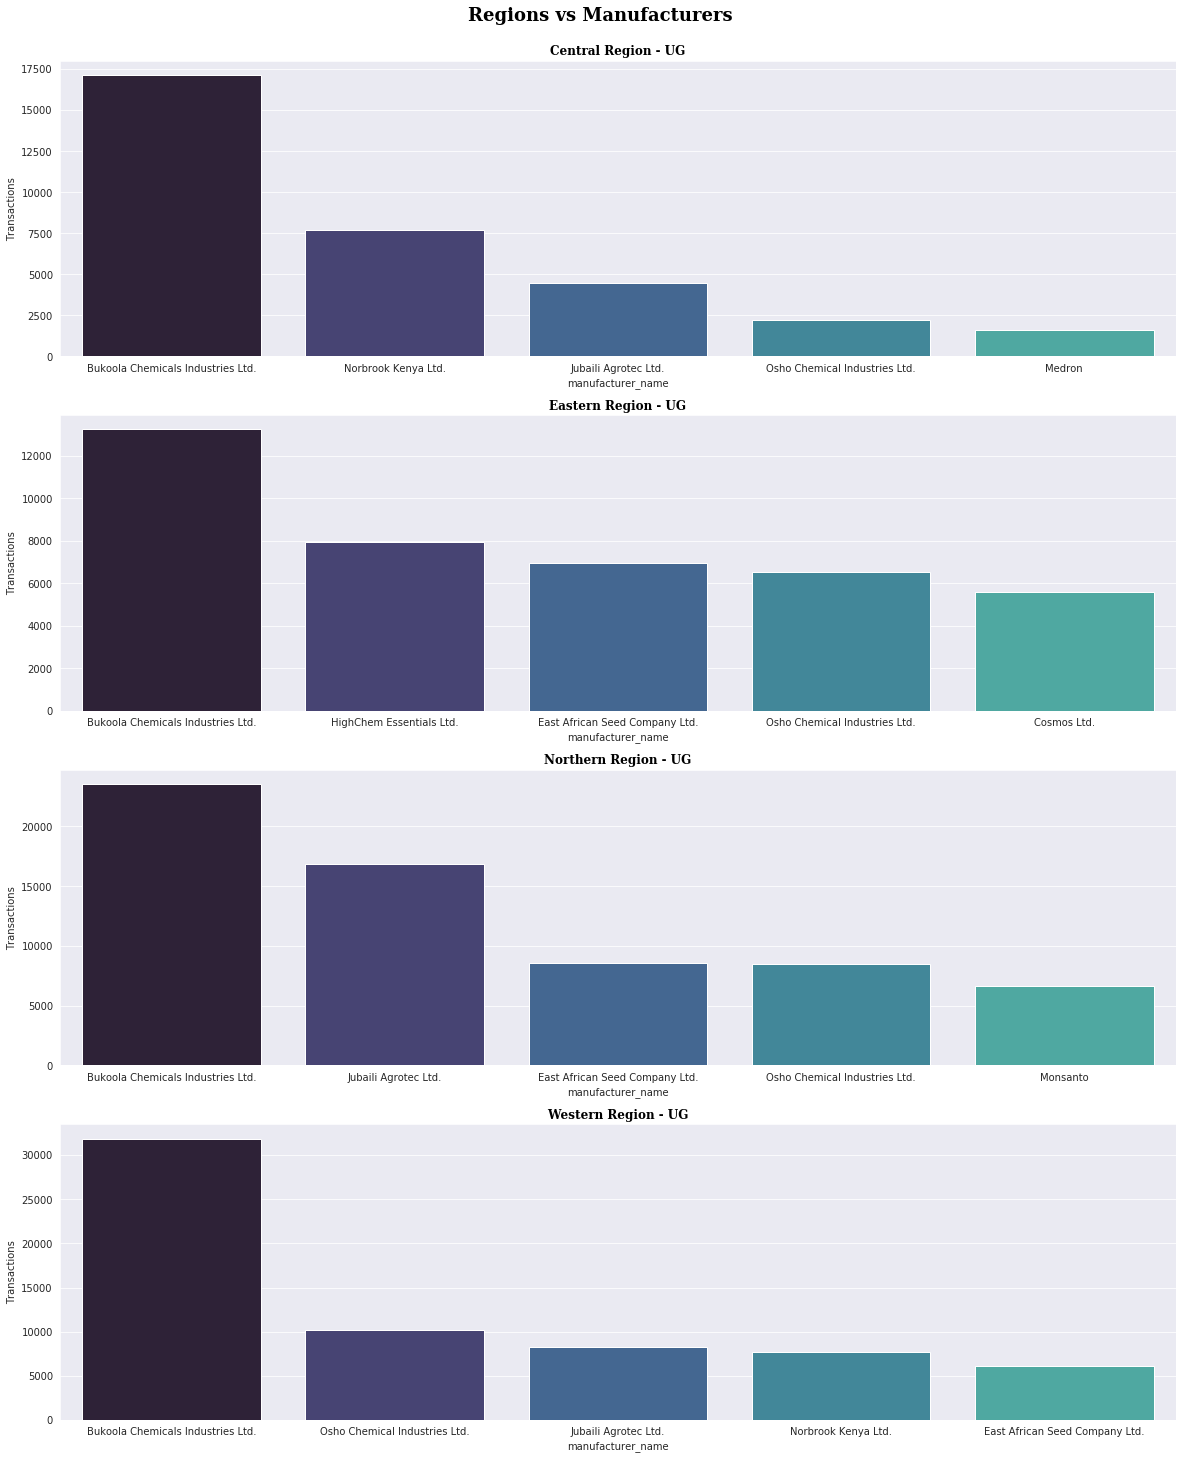

In [11]:
_=df.groupby('region_name')['manufacturer_name'].value_counts()
most_common_manuf = _.groupby('region_name').head()
manuf_by_region = pd.DataFrame(most_common_manuf)
manuf_by_region.rename(columns = {'manufacturer_name': 'count'}, inplace=True)
manuf_by_region.reset_index(inplace = True)
# manuf_by_region

# generating the figure and axes
fig, axs = plt.subplots(4, 1, figsize = (20,25))
# fig.subplots_adjust(hspace = .5, wspace=.1)
fig.suptitle('Regions vs Manufacturers', fontweight='bold', fontsize=18, color='black', fontfamily='serif', y=0.91)
axs = axs.ravel()   
regions = ['Central Region - UG', 'Eastern Region - UG', 'Northern Region - UG', 'Western Region - UG']
for n, region in enumerate(regions):
    data = manuf_by_region[manuf_by_region['region_name'] == region]
    sns.barplot(x = data['manufacturer_name'], y = data['count'], palette= palette, ax = axs[n])
    axs[n].set_title(region, fontweight='bold', fontsize=12, color='black', fontfamily='serif')
    axs[n].set_ylabel('Transactions')

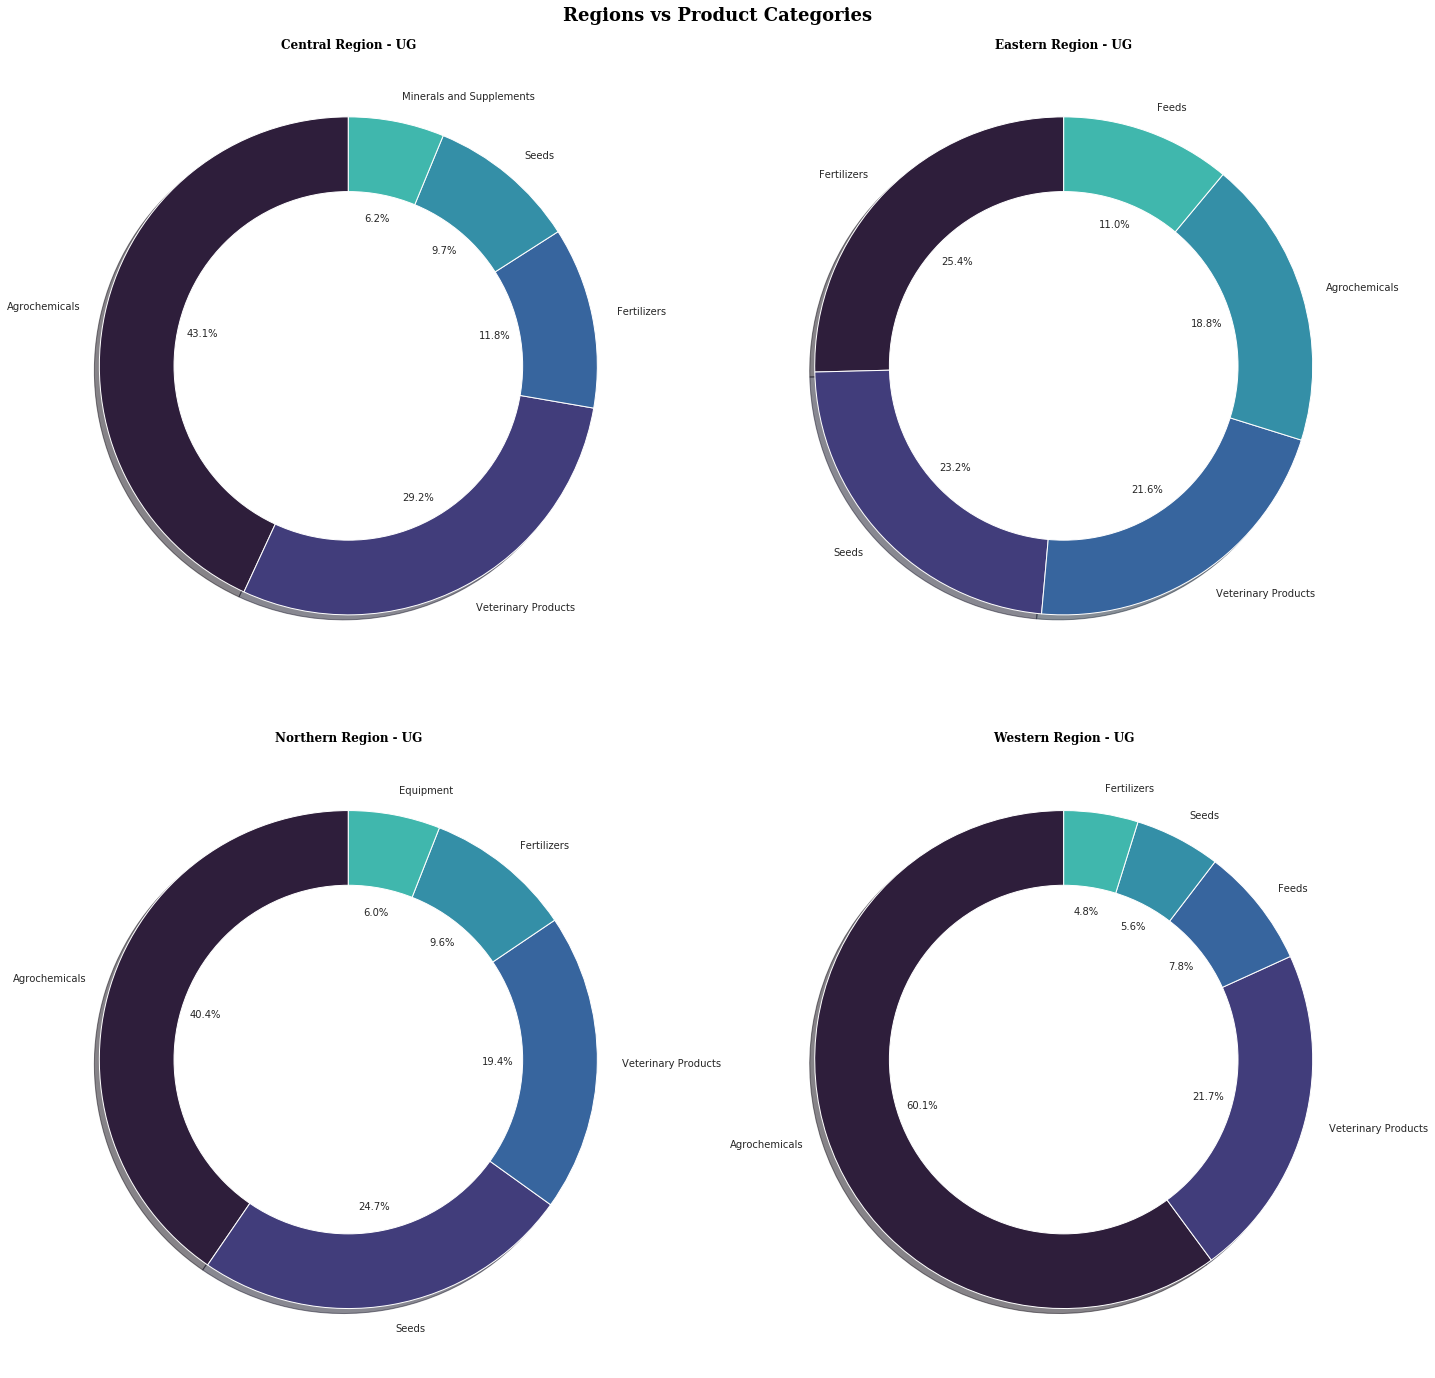

In [11]:
_=df.groupby('region_name')['category_name'].value_counts()
most_common_categ = _.groupby('region_name').head()
categ_by_region = pd.DataFrame(most_common_categ)
categ_by_region.rename(columns = {'category_name': 'count'}, inplace=True)
categ_by_region.reset_index(inplace = True)
categ_by_region

# generating the figure and axes
fig, axs = plt.subplots(2, 2, figsize = (20,20))
fig.subplots_adjust(hspace = .5, wspace=.1)
fig.suptitle('Regions vs Product Categories', fontweight='bold', fontsize=18, color='black', fontfamily='serif', y=0.99)
axs = axs.ravel()   
regions = ['Central Region - UG', 'Eastern Region - UG', 'Northern Region - UG', 'Western Region - UG']

def donut_plot(df, col, title, ax, color = sns.color_palette("mako"), labels = None):
    data = df[col].value_counts()
    data = df[df[col] == region]
    if labels is None:
        labels = data['category_name']
    ax.pie(data['count'], colors = color, autopct = '%1.1f%%', shadow = True, startangle = 90, labels = labels)
    circle = plt.Circle((0,0), 0.7, color = 'white')
    ax.add_artist(circle)
    ax.set_title(title, fontweight='bold', fontsize=12, color='black', fontfamily='serif')
    plt.tight_layout()

for n, region in enumerate(regions):
    title = region
    donut_plot(categ_by_region, 'region_name', title = title, ax = axs[n])